In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
import urllib.request
import tool_box as tb

In [2]:
df = pd.read_csv("./data/train.csv", index_col = 'laptop_ID')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.OpSys.value_counts()

OpSys
Windows 10      741
Linux            48
No OS            44
Windows 7        29
Chrome OS        24
macOS            11
Windows 10 S      7
Mac OS X          6
Android           2
Name: count, dtype: int64

In [5]:
df.Company.value_counts()

Company
Lenovo       202
Dell         197
HP           194
Asus         121
Acer          74
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Samsung        5
Microsoft      5
Xiaomi         3
Huawei         2
Chuwi          2
Google         2
Vero           2
Fujitsu        2
LG             1
Name: count, dtype: int64

In [6]:
df.sample(20)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
401,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Linux,2.33kg,778.87
119,HP,Probook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63kg,1084.00
1283,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
63,Lenovo,IdeaPad 520S-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.7kg,599.00
709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.00
114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.00
1177,HP,Spectre Pro,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,2041.00
1108,Dell,Inspiron 5370,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,818.35
1268,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,324.00


In [78]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620       185
Intel HD Graphics 520       125
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon RX 540             1
Nvidia Quadro M2000M          1
Nvidia GeForce GTX 940M       1
AMD Radeon R5 520             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

In [7]:
import tool_box as tb

In [8]:
tb.describe_df(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN (%),2.08,52.63,0.66,1.86,3.95,11.73,0.99,4.06,10.2,0.99,18.09,66.12


In [3]:
train_set, test_set = train_test_split(df, test_size = 0.20, random_state = 42)

- Elimino las filas que cointienen en la columna OpSys el nombre Mac Os X, porque al hacer el split no se encuentra en ambos sets. Se ha intentado hacer varios splits estratificados pero me entorpece en otras columnas asique elimino 6 instancias del dataset con la variable Mac Os X

In [4]:
train_set = train_set[train_set.Company != 'Huawey']

In [5]:
test_set = test_set[test_set.Company != 'Huawey']

In [ ]:
#onehot_company = train_set.Company.value_counts().index.to_list()

In [ ]:
#onehot_company_test = test_set.Company.value_counts().index.to_list()

In [6]:
train_set = train_set[train_set.OpSys != 'Android']

In [7]:
test_set = test_set[test_set.OpSys != 'Android']

In [ ]:
#onehot_Opsys = train_set.OpSys.value_counts().index.to_list()

In [ ]:
#onehot_Opsys_test = test_set.OpSys.value_counts().index.to_list()

In [8]:
target = 'Price_in_euros'

In [9]:
train_set['ram_GB']=train_set.Ram.str.replace("GB", "").astype(int)
train_set['weight_kg']=train_set.Weight.str.replace("kg", "").astype(float)
test_set['ram_GB']=test_set.Ram.str.replace("GB", "").astype(int)
test_set['weight_kg']=test_set.Weight.str.replace("kg", "").astype(float)

In [16]:
tb.describe_df(train_set)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_GB,weight_kg
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,17,407,6,14,32,92,8,33,84,8,147,504,8,141
CARDIN (%),2.34,55.91,0.82,1.92,4.4,12.64,1.1,4.53,11.54,1.1,20.19,69.23,1.1,19.37


In [79]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620       185
Intel HD Graphics 520       125
Intel UHD Graphics 620       52
Nvidia GeForce GTX 1050      48
Nvidia GeForce 940MX         31
                           ... 
AMD Radeon RX 540             1
Nvidia Quadro M2000M          1
Nvidia GeForce GTX 940M       1
AMD Radeon R5 520             1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 93, dtype: int64

In [82]:
a = 'Intel HD Graphics 620'
b = a.split(' ')[0]
b

'Intel'

In [10]:
lista = []
for x in train_set['Gpu']:
    a = x.split(" ")[0]
    lista.append(a)

In [11]:
train_set['Gpu_new'] = lista
train_set.Gpu_new.value_counts()

Gpu_new
Intel     416
Nvidia    220
AMD        92
Name: count, dtype: int64

In [12]:
lista_test = []
for x in test_set['Gpu']:
    a = x.split(" ")[0]
    lista_test.append(a)

In [13]:
test_set['Gpu_new'] = lista_test
test_set.Gpu_new.value_counts()

Gpu_new
Intel     91
Nvidia    64
AMD       27
Name: count, dtype: int64

In [14]:
train_set.describe()

,Inches,Price_in_euros,ram_GB,weight_kg
count,728.000000,728.000000,728.000000,728.000000
mean,15.009615,1104.551387,8.239011,2.035598
std,1.418066,672.925790,4.987248,0.666705
min,11.300000,191.900000,2.000000,0.810000
25%,14.000000,598.742500,4.000000,1.500000
50%,15.600000,985.000000,8.000000,2.040000
75%,15.600000,1462.000000,8.000000,2.300000
max,17.300000,6099.000000,64.000000,4.700000


In [14]:
lista = []
for x in train_set['ScreenResolution']:
    a = x.split(" ")
    b = a[-1].split('x')
    c = int(b[0])*int(b[1])
    lista.append(c)

In [15]:
train_set['pixel'] = lista



In [17]:
train_set.describe()

,Inches,Price_in_euros,ram_GB,weight_kg,pixel
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02
mean,15.009615,1104.551387,8.239011,2.035598,2.147054e+06
std,1.418066,672.925790,4.987248,0.666705,1.366725e+06
min,11.300000,191.900000,2.000000,0.810000,1.049088e+06
25%,14.000000,598.742500,4.000000,1.500000,1.296000e+06
50%,15.600000,985.000000,8.000000,2.040000,2.073600e+06
75%,15.600000,1462.000000,8.000000,2.300000,2.073600e+06
max,17.300000,6099.000000,64.000000,4.700000,8.294400e+06


In [16]:
lista_test = []
for x in test_set['ScreenResolution']:
    a = x.split(" ")
    b = a[-1].split('x')
    c = int(b[0])*int(b[1])
    lista_test.append(c)

test_set['pixel'] = lista_test

In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 1118 to 418
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           728 non-null    object 
 1   Product           728 non-null    object 
 2   TypeName          728 non-null    object 
 3   Inches            728 non-null    float64
 4   ScreenResolution  728 non-null    object 
 5   Cpu               728 non-null    object 
 6   Ram               728 non-null    object 
 7   Memory            728 non-null    object 
 8   Gpu               728 non-null    object 
 9   OpSys             728 non-null    object 
 10  Weight            728 non-null    object 
 11  Price_in_euros    728 non-null    float64
 12  ram_GB            728 non-null    int64  
 13  weight_kg         728 non-null    float64
 14  Gpu_new           728 non-null    object 
 15  pixel             728 non-null    int64  
dtypes: float64(3), int64(2), object(11)
memory usa

In [37]:
feat_num = ['Inches', 'ram_GB', 'weight_kg', 'pixel']

In [38]:
df.Company.value_counts()

Company
Lenovo       202
Dell         197
HP           194
Asus         121
Acer          74
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Samsung        5
Microsoft      5
Xiaomi         3
Huawei         2
Chuwi          2
Google         2
Vero           2
Fujitsu        2
LG             1
Name: count, dtype: int64

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

#categories = [onehot_company]
#ordinal_encoder = OrdinalEncoder(categories= categories)
#train_set["Company"] = ordinal_encoder.fit_transform(train_set[["Company"]])

In [ ]:
#categories = [onehot_company_test]
#ordinal_encoder = OrdinalEncoder(categories= categories)
#test_set["Company"] = ordinal_encoder.fit_transform(test_set[["Company"]])

In [ ]:
#categories = [onehot_Opsys]
#ordinal_encoder = OrdinalEncoder(categories= categories)
#train_set["OpSys"] = ordinal_encoder.fit_transform(train_set[["OpSys"]])

In [ ]:
#categories = [onehot_Opsys_test]
#ordinal_encoder = OrdinalEncoder(categories= categories)
#test_set["OpSys"] = ordinal_encoder.fit_transform(test_set[["OpSys"]])

In [ ]:
#feat_num.append('Company')
#feat_num.append('OpSys')

In [44]:
feat_num

['Inches', 'ram_GB', 'weight_kg', 'pixel', 'Company', 'OpSys']

In [18]:
a = df.Company.unique()
lista_company = []
for x in a:
    lista_company.append(x)

In [19]:
otros = []
for company in lista_company:
    if df.loc[df['Company'] == company, 'Company'].value_counts()[0] < 7:
        otros.append(company)

C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\1552707568.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[df['Company'] == company, 'Company'].value_counts()[0] < 7:
C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\1552707568.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[df['Company'] == company, 'Company'].value_counts()[0] < 7:
C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\1552707568.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

In [20]:
for x in otros:
    if x in train_set['Company'].unique():
        train_set.loc[train_set['Company'] == x, 'Company'] = 'Otros'

In [21]:
for x in otros:
    if x in test_set['Company'].unique():
        test_set.loc[test_set['Company'] == x, 'Company'] = 'Otros'

In [22]:
train_set.Company.value_counts()

Company
Lenovo     161
Dell       158
HP         155
Asus       101
Acer        55
Toshiba     31
MSI         30
Otros       24
Apple       13
Name: count, dtype: int64

In [23]:
test_set.Company.value_counts()

Company
HP         39
Lenovo     39
Dell       39
Asus       20
Acer       19
Otros      12
MSI         7
Apple       4
Toshiba     3
Name: count, dtype: int64

In [24]:
train_set = pd.get_dummies(train_set, columns = ['Gpu_new'], dtype = int)
test_set= pd.get_dummies(test_set, columns = ['Gpu_new'], dtype = int)

In [25]:
train_set = pd.get_dummies(train_set, columns = ['TypeName'], dtype = int)
test_set= pd.get_dummies(test_set, columns = ['TypeName'], dtype = int)

In [26]:
train_set = pd.get_dummies(train_set, columns = ['Company'], dtype = int)
test_set= pd.get_dummies(test_set, columns = ['Company'], dtype = int)

In [90]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 1118 to 418
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           728 non-null    float64
 1   Product           728 non-null    object 
 2   TypeName          728 non-null    object 
 3   Inches            728 non-null    float64
 4   ScreenResolution  728 non-null    object 
 5   Cpu               728 non-null    object 
 6   Ram               728 non-null    object 
 7   Memory            728 non-null    object 
 8   Gpu               728 non-null    object 
 9   OpSys             728 non-null    float64
 10  Weight            728 non-null    object 
 11  Price_in_euros    728 non-null    float64
 12  ram_GB            728 non-null    float64
 13  weight_kg         728 non-null    float64
 14  pixel             728 non-null    float64
 15  Gpu_new_AMD       728 non-null    int64  
 16  Gpu_new_Intel     728 non-null    int64  
 17 

In [92]:
feat_num.append('Gpu_new_AMD')
feat_num.append('Gpu_new_Intel')
feat_num.append('Gpu_new_Nvidia')

In [93]:
feat_num

['Inches',
 'ram_GB',
 'weight_kg',
 'pixel',
 'Company',
 'OpSys',
 'Gpu_new_AMD',
 'Gpu_new_Intel',
 'Gpu_new_Nvidia']

In [35]:
target

'Price_in_euros'

(['Inches',
  'ram_GB',
  'weight_kg',
  'pixel',
  'Company',
  'OpSys',
  'Gpu_new_AMD',
  'Gpu_new_Intel',
  'Gpu_new_Nvidia'],
 <Figure size 1000x1000 with 2 Axes>)

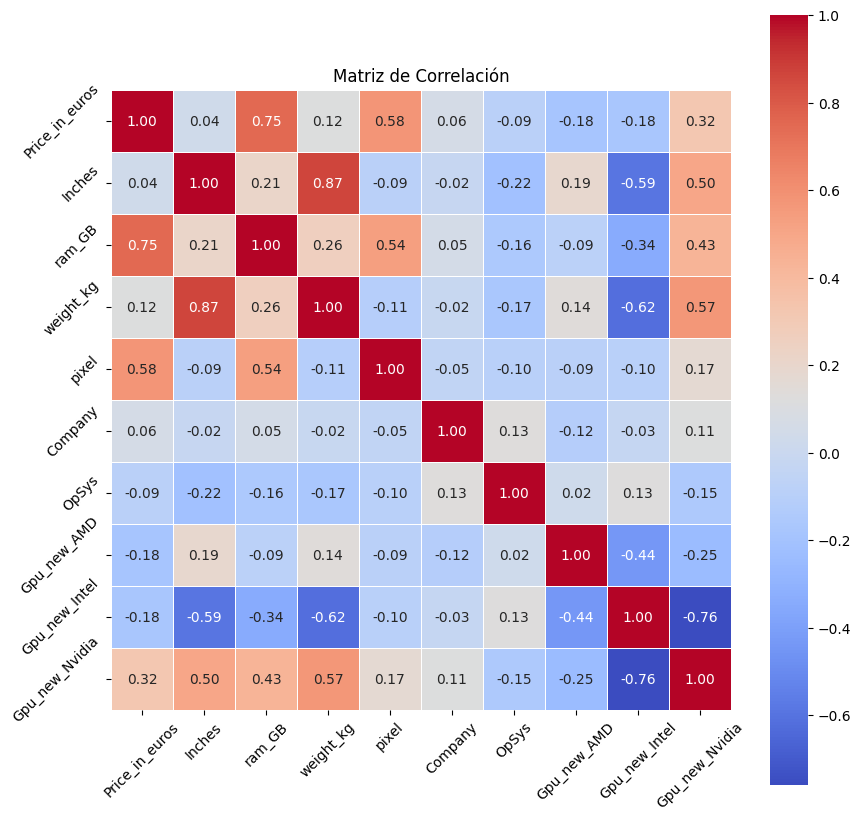

In [94]:
tb.get_features_num_regression(train_set[feat_num + [target]], target, 0.0)

In [27]:
train_set = pd.get_dummies(train_set, columns = ['OpSys'], dtype = int)
test_set= pd.get_dummies(test_set, columns = ['OpSys'], dtype = int)

In [29]:
feat_num_train = train_set.describe().columns.to_list()

In [30]:
feat_num_test = test_set.describe().columns.to_list()

In [31]:
print(len(feat_num_train))
print(len(feat_num_test))

31
30


In [33]:
feat_num_train.remove(target)

In [57]:
feat_num_train

['Inches',
 'ram_GB',
 'weight_kg',
 'pixel',
 'Gpu_new_AMD',
 'Gpu_new_Intel',
 'Gpu_new_Nvidia',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Dell',
 'Company_HP',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Otros',
 'Company_Toshiba',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS']

In [38]:
feat_num_test.remove(target)

In [37]:
feat_num_train.remove('OpSys_Mac OS X')

In [39]:
print(len(feat_num_train))
print(len(feat_num_test))

29
29


- feat_num contiene las columnas numericas transformadas de 'inches', 'pixel'(multiplicacion resolutionScreen), 'ram_gb, 'weight_kg', el one hot encoding de la categoriga OpSys.

array([[<Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'ram_GB'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'pixel'}>],
       [<Axes: title={'center': 'Company'}>,
        <Axes: title={'center': 'OpSys'}>]], dtype=object)

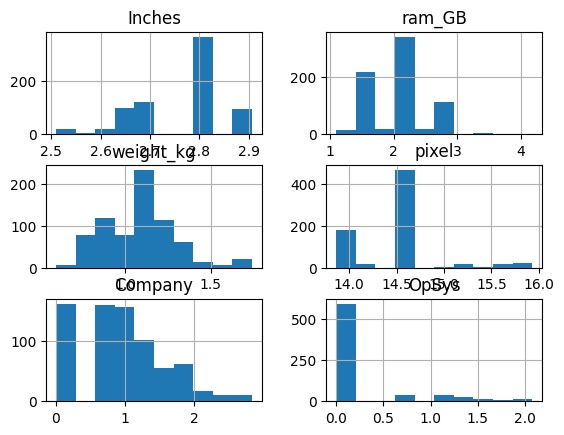

In [77]:
train_set[feat_num].hist()

In [68]:
for x in feat_num:
    train_set[x] = train_set[x].apply(np.log1p)
    test_set[x] = test_set[x].apply(np.log1p)

In [40]:
X_train = train_set[feat_num_train]
y_train = train_set[target]
X_test = test_set[feat_num_train]
y_test = test_set[target]


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [42]:
model_names = ["Arbol regresor","Random Forest","XGBoost","LightGBM", 'Catboost']
dtr_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
rf_reg = RandomForestRegressor(max_depth=10, random_state= 42)
xgb_reg = XGBRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state= 42, verbose = -100)
cat_reg = CatBoostRegressor(random_state= 42, verbose = False)


model_set = [dtr_reg, rf_reg, xgb_reg, lgb_reg, cat_reg]

In [43]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

DecisionTreeRegressor(max_depth=10, random_state=42)
RandomForestRegressor(max_depth=10, random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [44]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Arbol regresor>, RMSE_CV: 378.20187199665935
Model <Random Forest>, RMSE_CV: 333.74067086440687
Model <XGBoost>, RMSE_CV: 341.5951554487556
Model <LightGBM>, RMSE_CV: 341.72241656749145
Model <Catboost>, RMSE_CV: 309.9536260138692
El ganador es Catboost


In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [46]:


param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          #'bagging_fraction': [0.3,0.6,1], No hay hiperparámetro equivalente
          'colsample_bylevel': [0.5,1],
          'iterations': [100, 250, 500, 750],
          "border_count": [125,250]
          }


cat_ran = RandomizedSearchCV(cat_reg, 
                               cv = 3,
                               n_iter = 3,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


cat_ran.fit(X_train, y_train)
print("CatBoost best_score:", np.sqrt(-cat_ran.best_score_))


CatBoost best_score: 324.9287733238093


In [47]:
y_pred_random = cat_ran.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred_random))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_random))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_random)))

MAE: 224.7471099684457
MAPE: 0.2256674212650406
RMSE: 336.3449131710213


In [48]:
param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          #'bagging_fraction': [0.3,0.6,1], No hay hiperparámetro equivalente
          'colsample_bylevel': [0.5,1],
          'iterations': [100, 250, 500, 750],
          "border_count": [125,250]
          }
cat_grid = GridSearchCV(cat_reg, 
                            cv = 3,
                            param_grid= param_grid, 
                            scoring = "neg_mean_squared_error",
                            n_jobs=-1)


cat_grid.fit(X_train, y_train)
print("Catboost best_score:", np.sqrt(-cat_grid.best_score_))

Catboost best_score: 302.1216576822086


In [49]:
cat_grid.best_params_

{'border_count': 250,
 'colsample_bylevel': 0.5,
 'depth': 3,
 'iterations': 500,
 'learning_rate': 0.2}

In [50]:
y_pred = cat_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 215.86216832133513
MAPE: 0.20100323842193243
RMSE: 334.2023699204156


## Preparamos el X_pred 

In [51]:
X_pred = pd.read_csv("./data/test.csv", index_col = 'laptop_ID')
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


- Tratamiento columnas Ram y Weight

In [52]:
X_pred['ram_GB']=X_pred.Ram.str.replace("GB", "").astype(int)
X_pred['weight_kg']=X_pred.Weight.str.replace("kg", "").astype(float)

- Tratamiento columna ScreenResolution

In [53]:
lista = []
for x in X_pred['ScreenResolution']:
    a = x.split(" ")
    b = a[-1].split('x')
    c = int(b[0])*int(b[1])
    lista.append(c)

X_pred['pixel'] = lista

- Tratamiento columna Company

In [58]:
X_pred.loc[X_pred['Company'] == 'Samsung', 'Company'] = 'Otros'

In [61]:
a = X_pred.Company.unique()
lista_company_pred = []
for x in a:
    lista_company_pred.append(x)

In [59]:
X_pred.Company.value_counts()

Company
Dell         100
Lenovo        95
HP            80
Asus          37
Acer          29
MSI           17
Toshiba       14
Otros          4
Apple          4
Vero           2
LG             2
Mediacom       1
Razer          1
Fujitsu        1
Google         1
Xiaomi         1
Chuwi          1
Microsoft      1
Name: count, dtype: int64

In [62]:
otros = []
for company in lista_company_pred:
    if X_pred.loc[X_pred['Company'] == company, 'Company'].value_counts()[0] < 4:
        otros.append(company)

C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\585093429.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_pred.loc[X_pred['Company'] == company, 'Company'].value_counts()[0] < 4:
C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\585093429.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_pred.loc[X_pred['Company'] == company, 'Company'].value_counts()[0] < 4:
C:\Users\MARTA\AppData\Local\Temp\ipykernel_18792\585093429.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

In [63]:
for x in otros:
    if x in X_pred['Company'].unique():
        X_pred.loc[X_pred['Company'] == x, 'Company'] = 'Otros'

In [64]:
X_pred.Company.value_counts()

Company
Dell       100
Lenovo      95
HP          80
Asus        37
Acer        29
MSI         17
Otros       15
Toshiba     14
Apple        4
Name: count, dtype: int64

- Tratamiento GPU

In [65]:
lista = []
for x in X_pred['Gpu']:
    a = x.split(" ")[0]
    lista.append(a)

X_pred['Gpu_new'] = lista
X_pred.Gpu_new.value_counts()

Gpu_new
Intel     213
Nvidia    116
AMD        61
ARM         1
Name: count, dtype: int64

In [66]:
X_pred.loc[X_pred['Gpu_new'] == 'ARM', 'Gpu_new'] = 'Nvidia'
X_pred.Gpu_new.value_counts()

Gpu_new
Intel     213
Nvidia    117
AMD        61
Name: count, dtype: int64

In [67]:
X_pred.TypeName.value_counts()

TypeName
Notebook              218
Gaming                 62
Ultrabook              55
2 in 1 Convertible     41
Workstation             9
Netbook                 6
Name: count, dtype: int64

In [69]:
X_pred.OpSys.value_counts()

OpSys
Windows 10      331
No OS            22
Windows 7        16
Linux            14
Chrome OS         3
macOS             2
Mac OS X          2
Windows 10 S      1
Name: count, dtype: int64

In [70]:
X_pred.loc[X_pred['OpSys'] == 'Mac OS X', 'OpSys'] = 'macOS'
X_pred.OpSys.value_counts()

OpSys
Windows 10      331
No OS            22
Windows 7        16
Linux            14
macOS             4
Chrome OS         3
Windows 10 S      1
Name: count, dtype: int64

- OneHot Encoding para las columnas Company, TypeName y OpSys

In [71]:
X_pred = pd.get_dummies(X_pred, columns = ['Company'], dtype = int)
X_pred = pd.get_dummies(X_pred, columns = ['TypeName'], dtype = int)
X_pred = pd.get_dummies(X_pred, columns = ['OpSys'], dtype = int)
X_pred = pd.get_dummies(X_pred, columns = ['Gpu_new'], dtype = int)

- Seleccion de features

In [72]:
feat_num = X_pred.describe().columns.to_list()
feat_num

['Inches',
 'ram_GB',
 'weight_kg',
 'pixel',
 'Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Dell',
 'Company_HP',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Otros',
 'Company_Toshiba',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS',
 'Gpu_new_AMD',
 'Gpu_new_Intel',
 'Gpu_new_Nvidia']

In [73]:
len(feat_num)

29

In [74]:
predictions_submit = cat_grid.best_estimator_.predict(X_pred[feat_num])
predictions_submit

array([1317.64155196,  355.63041461,  346.26507202,  882.14825015,
        936.63790643,  327.64355496,  701.08516767,  917.39985762,
       1150.31519122,  516.82572416, 2344.00827873, 1380.70067977,
        524.00864553, 1502.87504876,  775.53061765,  610.90422577,
       2988.36271348, 1450.23562442, 1996.84232332,  631.12822663,
       1468.49040529,  335.31150145,  787.89132957,  954.257865  ,
        555.48223325,  789.69638075,  691.54691448, 1150.3964677 ,
       2822.49636978, 1145.33612563, 2089.48767682,  448.23325511,
        859.6593395 , 3166.80608359, 1951.42469561, 1939.9579742 ,
        561.24246168, 1251.09258105,  836.75805663, 1828.4186745 ,
        590.83002902,  925.85803094,  604.41788054, 1447.90712968,
       1511.65383873, 1110.36869277, 1081.65093866,  526.63916407,
        730.07701769,  571.55594667, 1560.73421446,  780.07657335,
       1066.42330603,  331.6752293 , 1989.03191095, 1795.1240798 ,
        620.25976293, 1002.9020156 , 1053.13176075,  744.87029

In [75]:
submission = pd.DataFrame({'laptop_ID': X_pred.index, 'Price_in_euros': predictions_submit})

In [76]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1317.641552
1,1281,355.630415
2,1168,346.265072
3,1231,882.148250
4,1020,936.637906


In [77]:
submission.shape

(391, 2)

In [78]:
sample = pd.read_csv("data/sample_submission.csv")

In [79]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [80]:
chequeador(submission)

You're ready to submit!
